#**ZAD_19_3**

### Rozwiązanie w dalszej częsci pliku

In [64]:
# przetwarzanie danych
import numpy as np
import pandas as pd
# przekszta?canie – normalizacja danych
from sklearn.preprocessing import MinMaxScaler
# wizualizacja
import matplotlib.pyplot as plt
# sieci neuronowe
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
# ewaluacja modelu
from sklearn.metrics import mean_squared_error

In [65]:
dataset = pd.read_csv('airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index(['Month'], inplace=True)
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


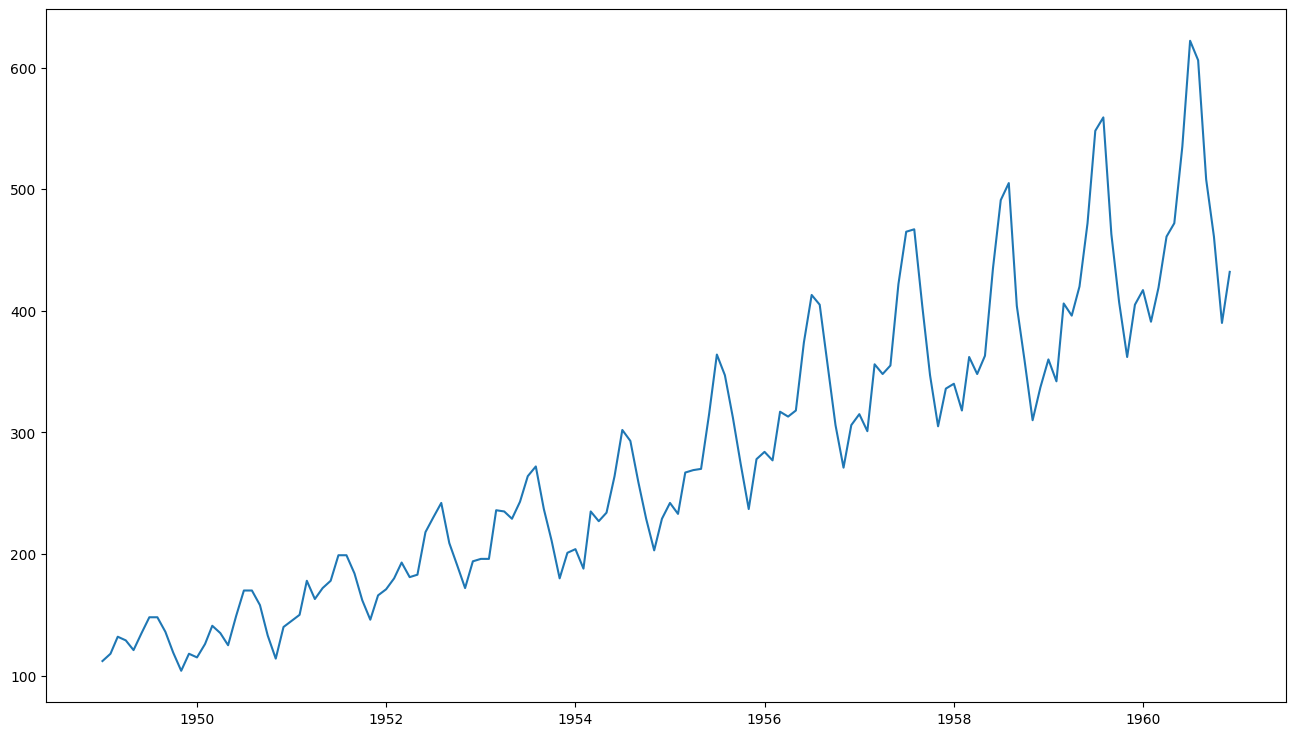

In [66]:
plt.figure(figsize=(16,9))
plt.plot(dataset['Passengers'])
plt.show()

In [67]:
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 3
def create_dataset(df, train_size, lback=look_back, scaler_function=scaler):
    test_size = len(df) - train_size
    train = df[0:train_size, :].copy()
    test = df[train_size:len(df), :].copy()

    train = scaler_function.fit_transform(train)
    test = scaler_function.transform(test)

    # Create sequences
    X_train, y_train = [], []
    X_test, y_test = [], []

    for i in range(lback, len(train)):
        X_train.append(train[i-lback:i, 0])
        y_train.append(train[i, 0])

    for i in range(lback, len(test)):
        X_test.append(test[i-lback:i, 0])
        y_test.append(test[i, 0])

    X_train, X_test = np.array(X_train), np.array(X_test)
    y_train, y_test = np.array(y_train), np.array(y_test)
    return X_train, X_test, y_train, y_test


In [68]:
X_train, X_test, y_train, y_test = create_dataset(df=np.array(dataset), train_size=train_size,lback=look_back)

# Reshape data to be 3D [samples, timesteps, features] for RNN, LSTM, GRU
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))

In [69]:
X_train[:3]

array([[[0.02588997],
        [0.04530744],
        [0.09061489]],

       [[0.04530744],
        [0.09061489],
        [0.08090615]],

       [[0.09061489],
        [0.08090615],
        [0.05501618]]])

In [70]:
y_train[:3]

array([0.08090615, 0.05501618, 0.10032362])

In [71]:
#RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(5, input_shape=(look_back, 1))) # Corrected input_shape
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=200, batch_size=1,verbose=1)

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0105
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 9/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 
Epoch 10/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 11/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 
Epoch 12/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 
Epoch 13/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 14/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 
Epoch 15/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059

In [72]:
def backtests(model, lback=look_back):
    # The data is now reshaped in cell 4688d6f2, so no reshaping needed here
    # Assuming X_train and X_test are already in the correct 3D shape for prediction

    # predykcja - train
    prediction_train =scaler.inverse_transform(model.predict(X_train)) # Use reshaped X_train
    prediction_train =pd.Series(prediction_train.flatten(),
    index=dataset.index[lback:len(prediction_train)+lback])
    # predykcja - test
    prediction_test =scaler.inverse_transform(model.predict(X_test)) # Use reshaped X_test
    #prediction_test =pd.Series(prediction_test.flatten(),index=dataset.index[len(prediction_train)+(2*lback)+1:len(dataset)- 1])
    prediction_test = pd.Series(prediction_test.flatten(),index=dataset.index[-len(prediction_test):])
    # wizualizacja prognozy
    plt.figure(figsize=(16,9))
    plt.plot(dataset['Passengers'], color='blue', label='Truevalues')
    plt.plot(prediction_train, color='green', label='Prediction -Train')
    plt.plot(prediction_test, color='red', label='Prediction -Test')
    plt.legend(loc='upper left')
    plt.show()
    # obliczenie RMSE
    rmse = mean_squared_error(dataset.loc[prediction_test.index,:], prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


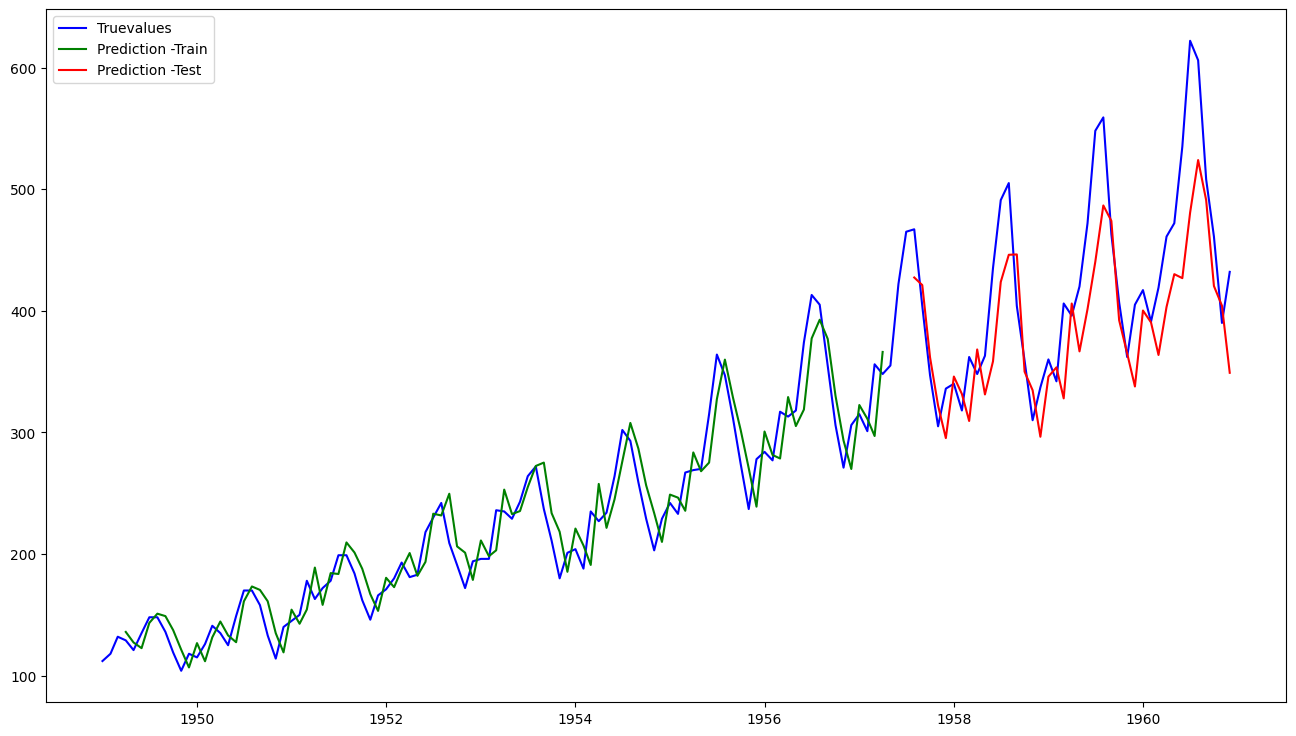


RMSE TEST: 53.73618554306539


In [73]:
# The data is now reshaped in cell 4688d6f2
backtests(model_rnn) # Use reshaped data automatically passed to backtests

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0747
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112
Epoch 10/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 
Epoch 11/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
Epoch 12/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107
Epoch 13/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110
Epoch 14/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107
Epoch 15/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111
Epoch 16/30
97/97 

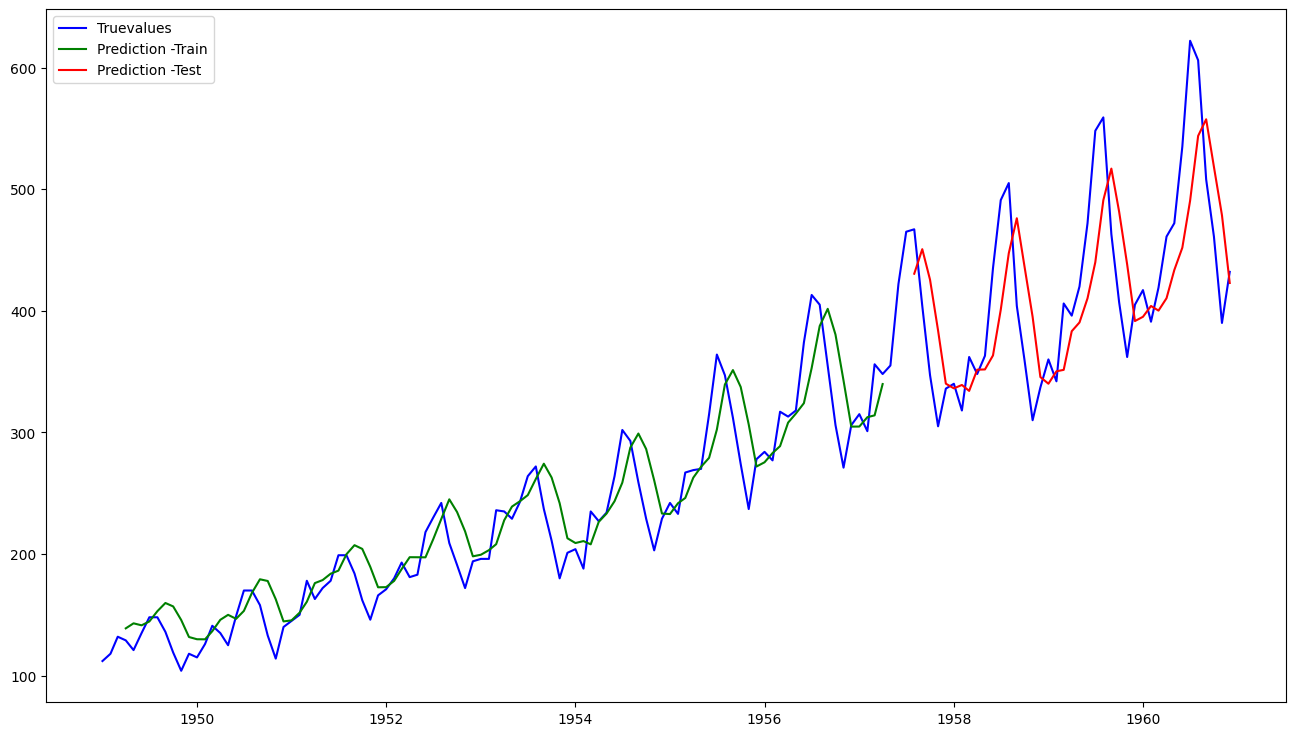


RMSE TEST: 58.03842889427336


In [74]:
from keras.layers import Input # Import Input layer

model_lstm = Sequential()
# timesteps = look_back, features = 1
model_lstm.add(Input(shape=(look_back, 1))) # Add explicit Input layer
model_lstm.add(LSTM(20)) # Removed input_shape from LSTM layer
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')


# The data is now reshaped in cell 4688d6f2
# For single-feature sequences
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm.fit(X_train, y_train, epochs=30, batch_size=1, verbose=1) # Use reshaped X_train

backtests(model_lstm) # Use reshaped X_test

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0515
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0133
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090
Epoch 10/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 
Epoch 11/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 12/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085
Epoch 13/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 14/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 
Epoch 15/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 16/30
97/97

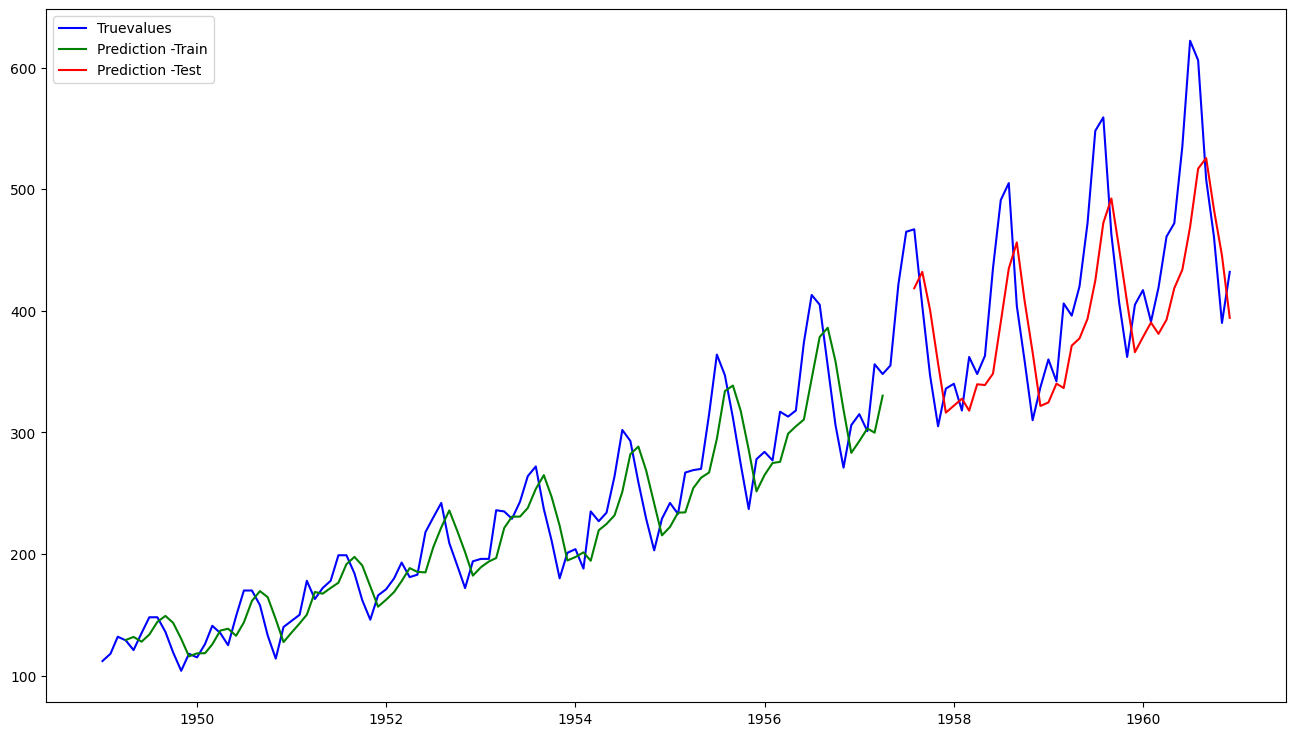


RMSE TEST: 59.31854223701894


In [75]:
#GRU
from keras.layers import Input # Import Input layer

model_gru = Sequential()
model_gru.add(Input(shape=(look_back, 1))) # Add explicit Input layer
model_gru.add(GRU(5)) # Removed input_shape from GRU layer as it's now in Input layer
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
# Use reshaped X_train (from cell 4688d6f2)
model_gru.fit(X_train, y_train, epochs=30, batch_size=1, # Reduced epochs for faster debugging
verbose=1)
# Use reshaped X_test (from cell 4688d6f2) in backtests
backtests(model_gru)

#**ZAD_19_3**

**Zadanie: prognoza vs wartości prawdziwe**
Pozostaw zbiór testowy jak obecnie. Zmień funkcję do backtestów oraz stworzenia zbiorów treningowego oraz testowego, tak aby nie ucinało pierwszych wartości ze zbioru testowego. Ze zbioru treningowego wyciągnij zbiór walidacyjny. Stwórz coś na wzór ‘siatki hiperparametrów’, tak jak dzieje się w GridSearch (Podpowiedź: Wystarczą pętle). Jako hiperparametry traktuj wartość dla zmiennej look_back oraz liczbę komórek w warstwie (units). Sprawdź zatem wszystkie architektury dla look_back z zakresu od 1 do 12 oraz units z zakresu 1 do 12. Wybierz model, który ma najniższą metrykę RMSE na zbiorze walidacyjnym i zwizualizuj prognozę vs wartości prawdziwe.

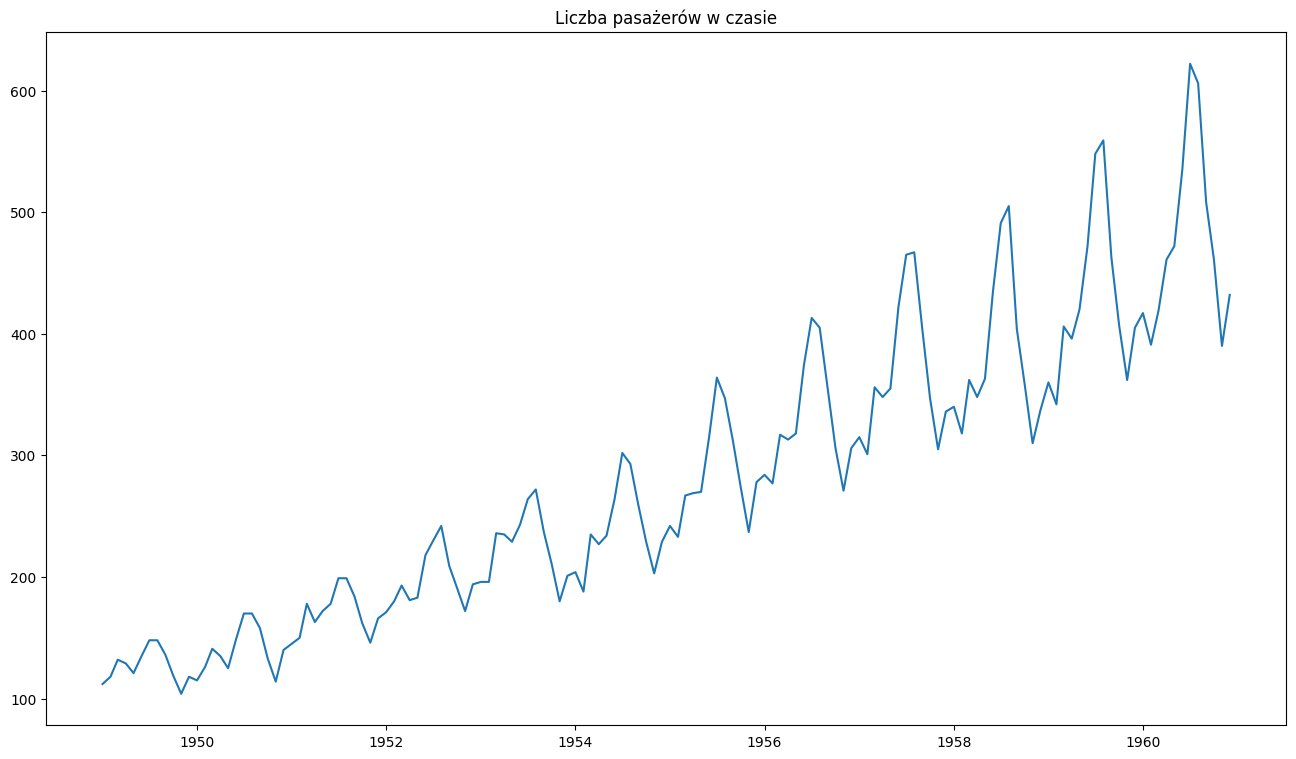

In [76]:
plt.figure(figsize=(16,9))
plt.plot(dataset['Passengers'])
plt.title("Liczba pasażerów w czasie")
plt.show()

In [77]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [78]:
def backtests(model, dataset, X_train, X_test, scaler, look_back):
    # Predykcja - train
    prediction_train = scaler.inverse_transform(model.predict(X_train))
    prediction_train = pd.Series(
        prediction_train.flatten(),
        index=dataset.index[look_back:look_back + len(prediction_train)]
    )

    # Predykcja - test
    prediction_test = scaler.inverse_transform(model.predict(X_test))
    # Indeksy dopasowane do końcowej części danych
    prediction_test = pd.Series(
        prediction_test.flatten(),
        index=dataset.index[-len(prediction_test):]
    )

    # Wizualizacja
    plt.figure(figsize=(16, 9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(prediction_train, color='green', label='Prediction - Train')
    #plt.plot(prediction_Val, color='green', label='Prediction - Val') #dodane
    plt.plot(prediction_test, color='red', label='Prediction - Test')
    plt.legend(loc='upper left')
    plt.show()

    # RMSE tylko dla testu
    y_true = dataset.loc[prediction_test.index, 'Passengers']
    rmse = mean_squared_error(y_true, prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse:.4f}')


In [79]:
def backtests2(model, dataset, X_train, X_val, X_test, scaler, look_back):
    # --- TRAIN ---
    prediction_train = scaler.inverse_transform(model.predict(X_train))
    prediction_train = pd.Series(
        prediction_train.flatten(),
        index=dataset.index[look_back:look_back + len(prediction_train)]
    )

    # --- VAL ---
    prediction_val = scaler.inverse_transform(model.predict(X_val))
    # dopasuj indeksy po zakończeniu train
    start_val = prediction_train.index[-1] + pd.Timedelta(1, unit='D') if isinstance(dataset.index, pd.DatetimeIndex) else len(prediction_train) + look_back
    prediction_val = pd.Series(
        prediction_val.flatten(),
        index=dataset.index[-len(X_val) - len(X_test):-len(X_test)]
    )

    # --- TEST ---
    prediction_test = scaler.inverse_transform(model.predict(X_test))
    prediction_test = pd.Series(
        prediction_test.flatten(),
        index=dataset.index[-len(prediction_test):]
    )

    # --- WIZUALIZACJA ---
    plt.figure(figsize=(16, 9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(prediction_train, color='green', label='Prediction - Train')
    plt.plot(prediction_val, color='orange', label='Prediction - Validation')
    plt.plot(prediction_test, color='red', label='Prediction - Test')
    plt.legend(loc='upper left')
    plt.title('Model Backtest (Train / Validation / Test)')
    plt.show()

    # --- RMSE TEST ---
    y_true_test = dataset.loc[prediction_test.index, 'Passengers']
    rmse_test = mean_squared_error(y_true_test, prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse_test:.4f}')


In [80]:
def create_dataset(df, look_back=3, scaler_function=scaler, train_size=0.7, val_size=0.1):
    data = scaler_function.fit_transform(df)
    data = np.array(data)

    # Ustalenie indeksów
    n_total = len(data)
    n_train = int(n_total * train_size)
    n_val = int(n_total * val_size)
    n_test = n_total - n_train - n_val

    train = data[:n_train]
    val = data[n_train:n_train + n_val]
    test = data[n_train + n_val:]

    def make_X_y(arr, lback):
        X, y = [], []
        for i in range(lback, len(arr)):
            X.append(arr[i - lback:i, 0])
            y.append(arr[i, 0])
        return np.array(X), np.array(y)

    # Train: klasycznie
    X_train, y_train = make_X_y(train, look_back)
    # Validation: doklejamy końcówkę z train
    X_val, y_val = make_X_y(np.concatenate([train[-look_back:], val]), look_back)
    # Test: doklejamy końcówkę z val — zachowując pierwsze punkty testowe
    X_test, y_test = make_X_y(np.concatenate([val[-look_back:], test]), look_back)

    # Reshape do formatu 3D dla RNN/LSTM
    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_val = X_val.reshape((X_val.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler_function


# LTSM

In [81]:
# --- Grid Search ---
look_back_range = range(1, 13)
units_range = range(1, 13)

In [82]:
results=[]
for look_back in look_back_range:
    for units in units_range:
        X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_dataset(dataset, look_back=look_back)

        model = Sequential([
            Input(shape=(look_back, 1)),
            LSTM(units),
            Dense(1)
        ])
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, y_train, epochs=3, batch_size=90, verbose=0)

        pred_val = scaler.inverse_transform(model.predict(X_val))
        true_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        rmse_val = np.sqrt(mean_squared_error(true_val, pred_val))
        results.append((look_back, units, rmse_val))
        print(f"look_back={look_back}, units={units}, RMSE={rmse_val:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
look_back=1, units=1, RMSE=271.8892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
look_back=1, units=2, RMSE=271.4473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
look_back=1, units=3, RMSE=271.6569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
look_back=1, units=4, RMSE=213.8424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
look_back=1, units=5, RMSE=293.4412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
look_back=1, units=6, RMSE=225.1155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
look_back=1, units=7, RMSE=293.3486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
look_back=1, units=8, RMSE=243.0460
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
look_back=1, units=9, RMSE=286.4150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
look_back=1, units=10, RMSE=301.3335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
look_back=1, units=11, RMSE=277.8549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
look_back=1, units=12, RMSE=241.8602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
look_back=2, units=1, RMSE=277.4011
1/1 ━━━━━━━━━━━━━━━━━━

In [83]:
# --- Wybór najlepszego modelu ---
results_df = pd.DataFrame(results, columns=['look_back', 'units', 'rmse_val'])
best = results_df.loc[results_df['rmse_val'].idxmin()]
best_look_back, best_units = int(best.look_back), int(best.units)
print("\nNajlepszy model:")
print(best)


Najlepszy model:
look_back      9.000000
units          4.000000
rmse_val     115.696935
Name: 99, dtype: float64


In [84]:
# --- Trenowanie najlepszego modelu i ewaluacja ---
X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_dataset(dataset, look_back=best_look_back)

model_best_ltsm = Sequential([
    Input(shape=(best_look_back, 1)),
    LSTM(best_units),
    Dense(1)
])

In [85]:
model_best_ltsm.compile(loss='mean_squared_error', optimizer='adam')
model_best_ltsm.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=150, batch_size=8, verbose=0)

pred_test_ltsm = scaler.inverse_transform(model_best_ltsm.predict(X_test))
true_test_ltsm = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse_test_ltsm = np.sqrt(mean_squared_error(true_test_ltsm, pred_test_ltsm))
print(f"\nRMSE TEST: {rmse_test_ltsm:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

RMSE TEST: 71.4704


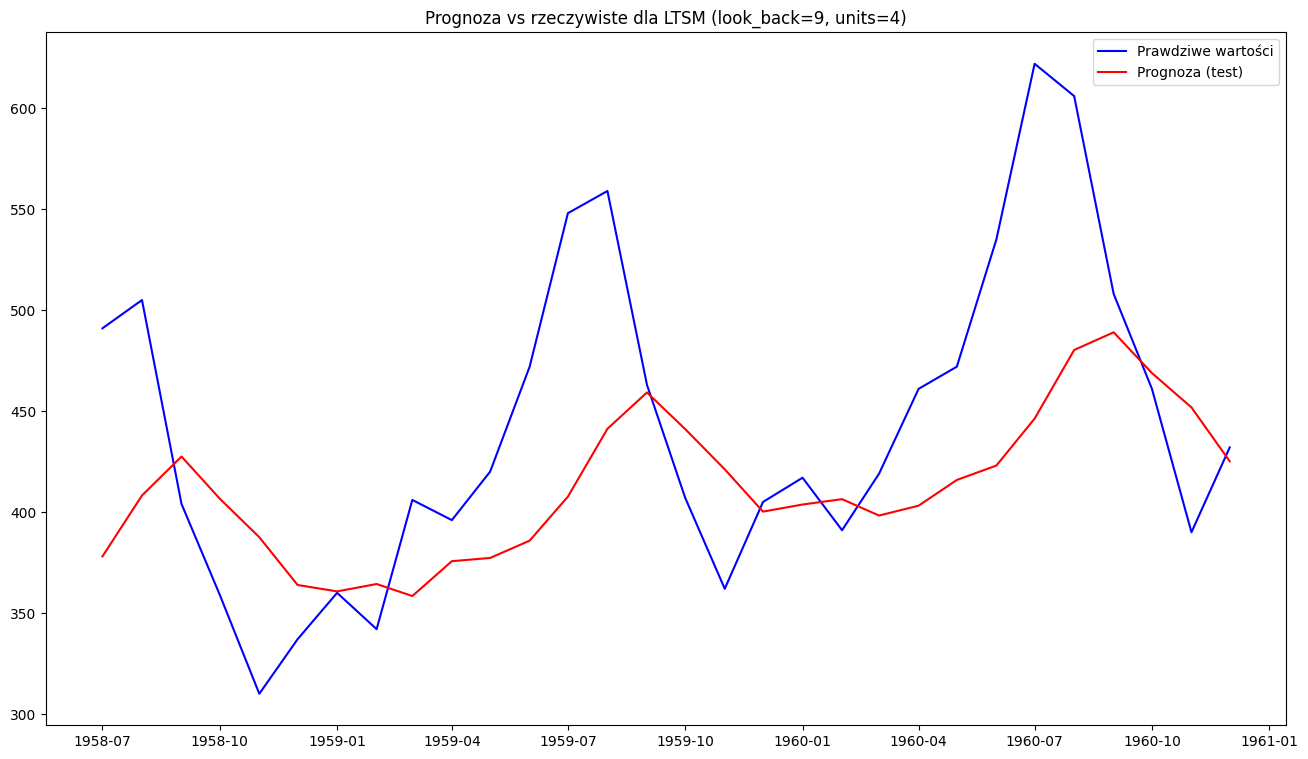

In [86]:
# --- Wizualizacja ---
plt.figure(figsize=(16,9))
plt.plot(dataset.index[-len(true_test_ltsm):], true_test_ltsm, label="Prawdziwe wartości", color='blue')
plt.plot(dataset.index[-len(pred_test_ltsm):], pred_test_ltsm, label="Prognoza (test)", color='red')
plt.title(f"Prognoza vs rzeczywiste dla LTSM (look_back={best_look_back}, units={best_units})")
plt.legend()
plt.show()

In [87]:
#backtests(model_best_ltsm, dataset, X_train, X_test, scaler, best_look_back)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


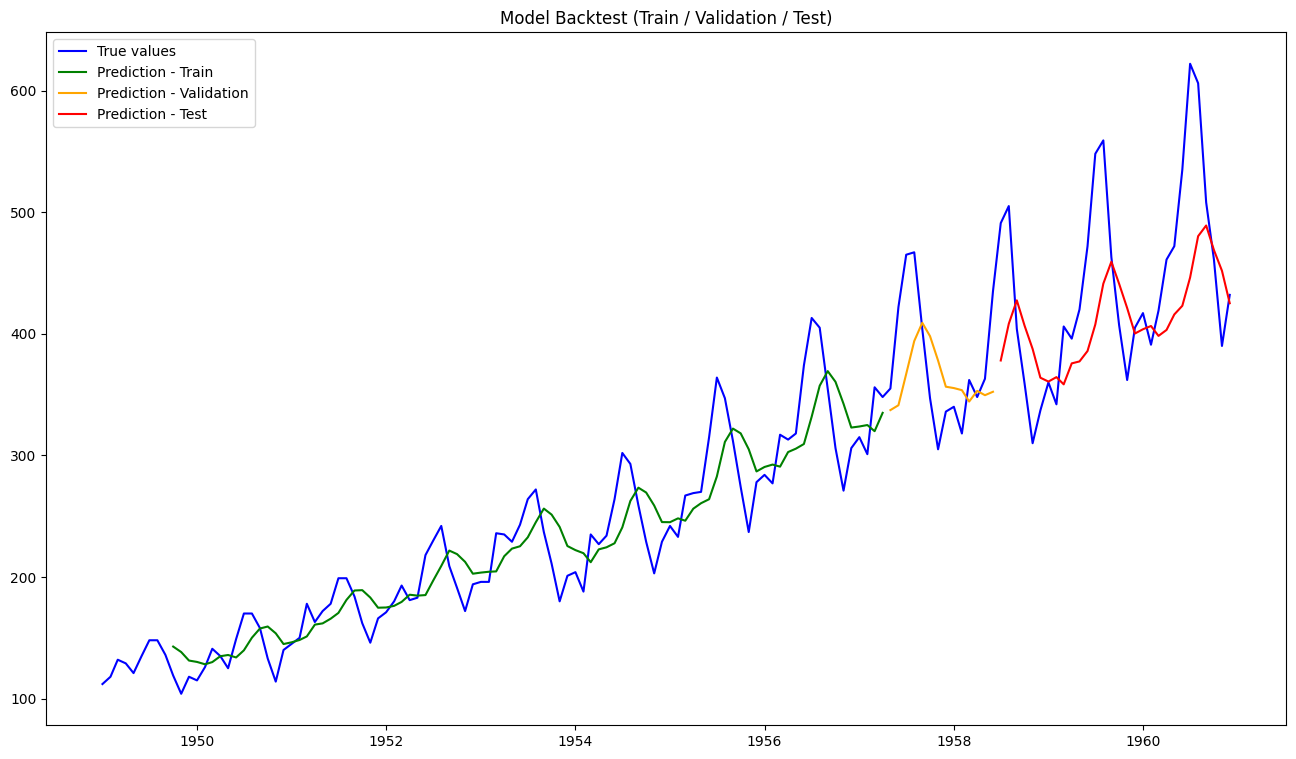


RMSE TEST: 71.4704


In [88]:
backtests2(model_best_ltsm, dataset, X_train,X_val, X_test, scaler, best_look_back)

# GRU

In [89]:
# --- Grid Search ---
look_back_range = range(1, 13)
units_range = range(1, 13)
results = []

In [90]:


for look_back in look_back_range:
    for units in units_range:
        X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_dataset(dataset, look_back=look_back)

        model = Sequential([
            Input(shape=(look_back, 1)),
            GRU(units),
            Dense(1)
        ])
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, y_train, epochs=5, batch_size=90, verbose=0)

        pred_val = scaler.inverse_transform(model.predict(X_val))
        true_val = scaler.inverse_transform(y_val.reshape(-1, 1))
        rmse_val = np.sqrt(mean_squared_error(true_val, pred_val))

        results.append((look_back, units, rmse_val))
        print(f"look_back={look_back}, units={units}, RMSE_val={rmse_val:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
look_back=1, units=1, RMSE_val=419.7948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
look_back=1, units=2, RMSE_val=290.2280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
look_back=1, units=3, RMSE_val=189.1144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
look_back=1, units=4, RMSE_val=312.2434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
look_back=1, units=5, RMSE_val=255.0393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
look_back=1, units=6, RMSE_val=245.7876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
look_back=1, units=7, RMSE_val=286.2537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
look_back=1, units=8, RMSE_val=271.5615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
look_back=1, units=9, RMSE_val=206.7875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
look_back=1, units=10, RMSE_val=298.1324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
look_back=1, units=11, RMSE_val=152.4880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
look_back=1, units=12, RMSE_val=202.1522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
look_back=

In [91]:
# --- Wyniki Grid Search ---
results_df = pd.DataFrame(results, columns=['look_back', 'units', 'rmse_val'])
best = results_df.loc[results_df['rmse_val'].idxmin()]
best_look_back, best_units = int(best.look_back), int(best.units)
print("\nNajlepszy model GRU:")
print(best)


Najlepszy model GRU:
look_back     2.000000
units         6.000000
rmse_val     46.410689
Name: 17, dtype: float64


In [92]:
# --- Trenowanie najlepszego modelu (na train+val) ---
X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_dataset(dataset, look_back=best_look_back)
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])

model_best_gru = Sequential([
    Input(shape=(best_look_back, 1)),
    GRU(best_units),
    Dense(1)
])


In [93]:
model_best_gru.compile(loss='mean_squared_error', optimizer='adam')
model_best_gru.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=150, batch_size=8, verbose=0)

pred_test_gru = scaler.inverse_transform(model_best_gru.predict(X_test))
true_test_gru = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse_test_gru = np.sqrt(mean_squared_error(true_test_gru, pred_test_gru))
print(f"\nRMSE TEST: {rmse_test_gru:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step

RMSE TEST: 59.9642


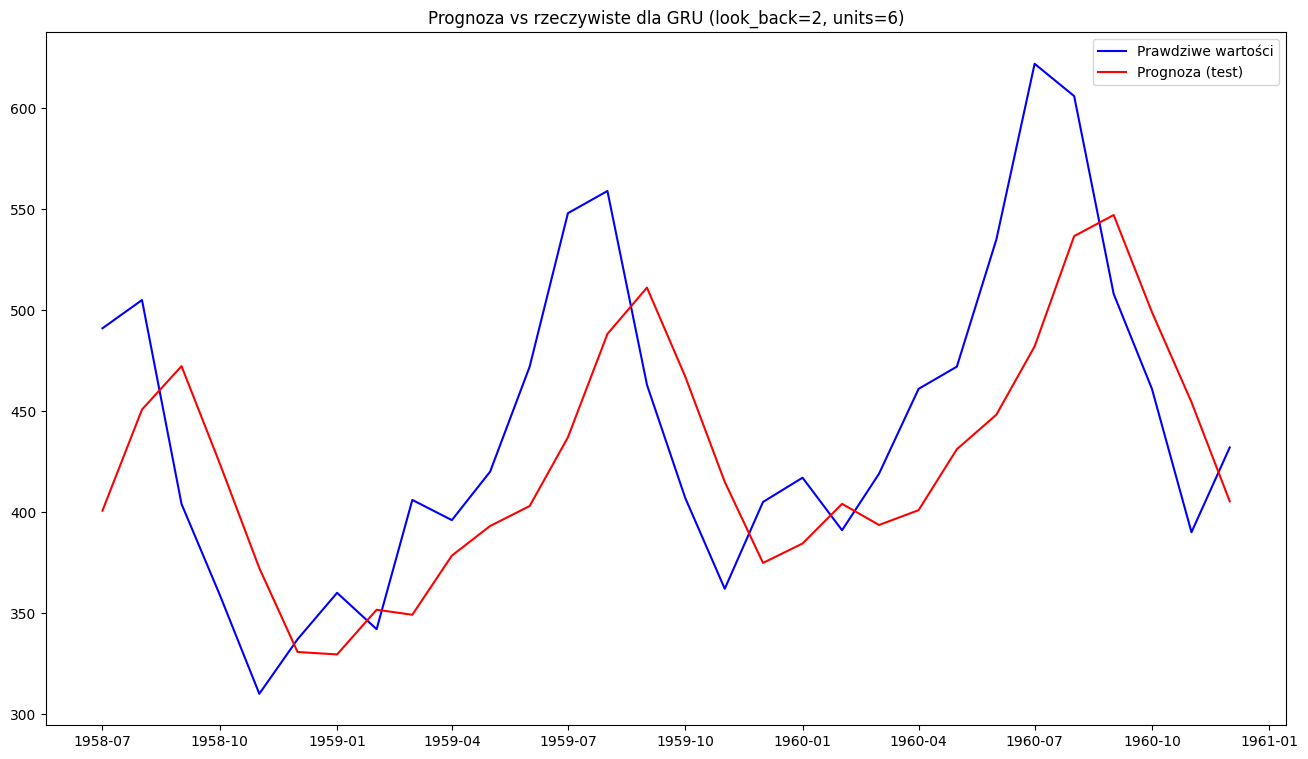

In [94]:
# --- Wizualizacja ---
plt.figure(figsize=(16,9))
plt.plot(dataset.index[-len(true_test_gru):], true_test_gru, label="Prawdziwe wartości", color='blue')
plt.plot(dataset.index[-len(pred_test_gru):], pred_test_gru, label="Prognoza (test)", color='red')
plt.title(f"Prognoza vs rzeczywiste dla GRU (look_back={best_look_back}, units={best_units})")
plt.legend()
plt.show()

In [95]:
#backtests(model_best_gru, dataset, X_train, X_test, scaler, best_look_back)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


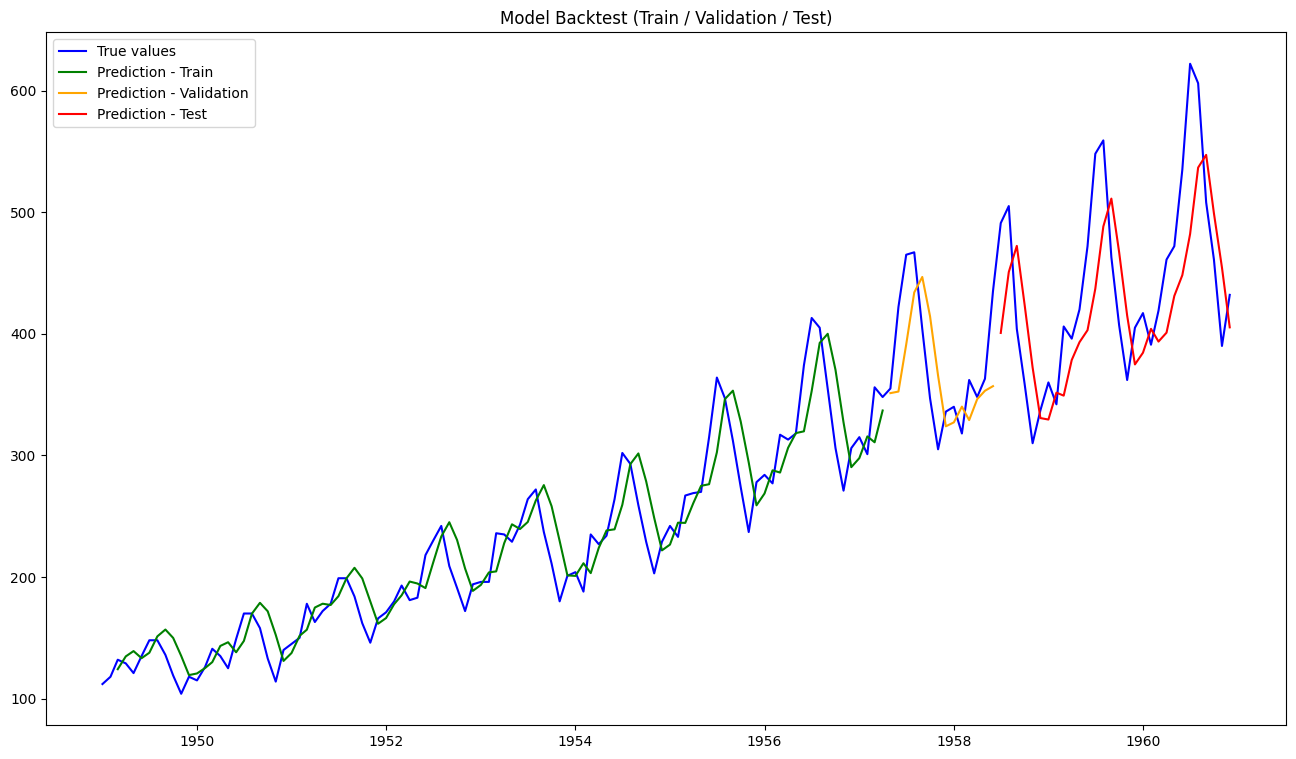


RMSE TEST: 59.9642


In [96]:
backtests2(model_best_gru, dataset, X_train,X_val, X_test, scaler, best_look_back)

In [97]:
print(f"Best LSTM Model RMSE on Test Set: {rmse_test_ltsm:.4f}")
print(f"Best GRU Model RMSE on Test Set: {rmse_test_gru:.4f}")

if rmse_test_ltsm < rmse_test_gru:
    print("\nThe best LSTM model performed better on the test set.")
elif rmse_test_gru < rmse_test_ltsm:
    print("\nThe best GRU model performed better on the test set.")
else:
    print("\nBoth models performed equally well on the test set.")

Best LSTM Model RMSE on Test Set: 71.4704
Best GRU Model RMSE on Test Set: 59.9642

The best GRU model performed better on the test set.
